# Double Pendulum solving using SymPy

## Libraries
The following libraries are used in this notebook:
* [SymPy](http://www.sympy.org/en/index.html) - symbolic mathematics library
* [NumPy](http://www.numpy.org/) - numerical mathematics library
* [SciPy](https://www.scipy.org/) - scientific computing library
* [Matplotlib](https://matplotlib.org/) - plotting library


### Installation (if needed)

In [1]:
# The following command is used to install the required packages, and we add --quiet to avoid printing the output.
%pip install sympy numpy matplotlib scipy mpld3 --quiet

Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from scipy.integrate import odeint
import sympy as sym
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

## Solve the system
We have a double pendulum with two links of length $l_1$ and $l_2$ and masses $m_1$ and $m_2$. The system is constrained to move in the $xy$ plane. The angle of the first link is $\theta_1$ and the angle of the second link is $\theta_2$. The angular velocities of the links are $\dot{\theta}_1$ and $\dot{\theta}_2$. The gravitational acceleration is $g$.

We define the following variables:
* $l_1$ - length of the first link, constant
* $l_2$ - length of the second link, constant
* $m_1$ - mass of the first link, constant
* $m_2$ - mass of the second link, constant
* $g$ - gravitational acceleration, constant
* $t$ - time, variable
* $\theta_1$ - angle of the first link, function of time
* $\theta_2$ - angle of the second link, function of time

In [2]:
theta_1, theta_2 = sym.symbols(r'\theta_1, \theta_2', cls = sym.Function)
t, g, l_1, l_2, m_1, m_2 = sym.symbols('t, g, l_1, l_2, m_1, m_2')

now, we define the angles as functions of time, $\theta_1(t)$ and $\theta_2(t)$.

In [3]:
theta_1 =  theta_1(t)
theta_2 =  theta_2(t)

Define derivatives and second derivatives of the angles:
* $\dot{\theta}_1(t)$ - first derivative of $\theta_1(t)$
* $\dot{\theta}_2(t)$ - first derivative of $\theta_2(t)$
* $\ddot{\theta}_1(t)$ - second derivative of $\theta_1(t)$
* $\ddot{\theta}_2(t)$ - second derivative of $\theta_2(t)$

In [4]:
theta_1_d = sym.diff(theta_1, t)
theta_2_d = sym.diff(theta_2, t)
theta_1_dd = sym.diff(theta_1_d, t)
theta_2_dd = sym.diff(theta_2_d, t)

Now, we define the rectangular coordinates of the center of mass of the first link, $x_1(t)$ and $y_1(t)$, and the center of mass of the second link, $x_2(t)$ and $y_2(t)$.

In [5]:
x1 = l_1 * sym.sin(theta_1)
y1 = -l_1 * sym.cos(theta_1)
x2 = l_1 * sym.sin(theta_1) + l_2 * sym.sin(theta_2)
y2 = -l_1 * sym.cos(theta_1) - l_2 * sym.cos(theta_2)

Let's define the kinetic energy of the system:
* $T$ - kinetic energy of the system

$$ T = \frac{1}{2} m_1 \dot{x}_1^2 + \frac{1}{2} m_1 \dot{y}_1^2 + \frac{1}{2} m_2 \dot{x}_2^2 + \frac{1}{2} m_2 \dot{y}_2^2 $$

Let's define the potential energy of the system:
* $V$ - potential energy of the system

$$ V = m_1 g y_1 + m_2 g y_2 $$

In [6]:
# Kinetic energy
T1 = 0.5 * m_1 * (sym.diff(x1, t) ** 2 + sym.diff(y1, t) ** 2)
T2 = 0.5 * m_2 * (sym.diff(x2, t) ** 2 + sym.diff(y2, t) ** 2)
T = T1 + T2

# Potential energy
V1 = m_1 * g * y1
V2 = m_2 * g * y2
V = V1 + V2

We continue by defining the Lagrangian of the system:
* $L$ - Lagrangian of the system

$$ L = T - V $$

In [7]:
L = T - V
L.simplify()

g*l_1*m_1*cos(\theta_1(t)) + g*m_2*(l_1*cos(\theta_1(t)) + l_2*cos(\theta_2(t))) + 0.5*l_1**2*m_1*Derivative(\theta_1(t), t)**2 + 0.5*m_2*(l_1**2*Derivative(\theta_1(t), t)**2 + 2*l_1*l_2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + l_2**2*Derivative(\theta_2(t), t)**2)

We can also get the energy of the system:

$$ E = T + V$$

In [8]:
E = T + V
E.simplify(rational=True).expand()

-g*l_1*m_1*cos(\theta_1(t)) - g*l_1*m_2*cos(\theta_1(t)) - g*l_2*m_2*cos(\theta_2(t)) + l_1**2*m_1*Derivative(\theta_1(t), t)**2/2 + l_1**2*m_2*Derivative(\theta_1(t), t)**2/2 + l_1*l_2*m_2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + l_2**2*m_2*Derivative(\theta_2(t), t)**2/2

In [9]:
p_1 = L.diff(theta_1_d)
p_1

0.5*m_1*(2*l_1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t) + 2*l_1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)) + 0.5*m_2*(2*l_1*(l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*sin(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_1(t)) + 2*l_1*(l_1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_1(t)))

In [10]:
p_2 = L.diff(theta_2_d)
p_2

0.5*m_2*(2*l_2*(l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*sin(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_2(t)) + 2*l_2*(l_1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_2(t)))

In [11]:
# Define hamiltonian
H = p_1*theta_1_d + p_2*theta_2_d - L
H.simplify()

-1.0*g*l_1*m_1*cos(\theta_1(t)) - 1.0*g*l_1*m_2*cos(\theta_1(t)) - 1.0*g*l_2*m_2*cos(\theta_2(t)) + 0.5*l_1**2*m_1*Derivative(\theta_1(t), t)**2 + 0.5*l_1**2*m_2*Derivative(\theta_1(t), t)**2 + 1.0*l_1*l_2*m_2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + 0.5*l_2**2*m_2*Derivative(\theta_2(t), t)**2

Then, we define the Lagrange equations of the system:

$$ \frac{d}{dt} \frac{\partial L}{\partial \dot{\theta}_1} - \frac{\partial L}{\partial \theta_1} = 0 $$
$$ \frac{d}{dt} \frac{\partial L}{\partial \dot{\theta}_2} - \frac{\partial L}{\partial \theta_2} = 0 $$

In [12]:
LE1 = sym.diff(sym.diff(L, theta_1_d), t).simplify() - sym.diff(L, theta_1)
LE2 = sym.diff(sym.diff(L, theta_2_d), t).simplify() - sym.diff(L, theta_2)

In [13]:
LE1

g*l_1*m_1*sin(\theta_1(t)) + g*l_1*m_2*sin(\theta_1(t)) + l_1*(l_1*m_1*Derivative(\theta_1(t), (t, 2)) + l_1*m_2*Derivative(\theta_1(t), (t, 2)) - l_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + l_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + l_2*m_2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2))) - 0.5*m_2*(2*l_1*(l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*sin(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) - 2*l_1*(l_1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_1(t))*Derivative(\theta_1(t), t))

Now, let's solve the system of equations for $\ddot{\theta}_1$ and $\ddot{\theta}_2$:
* $\ddot{\theta}_1$ - second derivative of $\theta_1(t)$
* $\ddot{\theta}_2$ - second derivative of $\theta_2(t)$

In [14]:
sols = sym.solve([LE1, LE2], (theta_1_dd, theta_2_dd), simplify=False, rational=False)

In [24]:
theta1_dot = sym.Symbol(r'\omega_1')
theta2_dot = sym.Symbol(r'\omega_2')
theta1_ddot = sym.Symbol(r'\dot{\omega}_1')
theta2_ddot = sym.Symbol(r'\dot{\omega}_2')

In [25]:
sym.Eq(theta_1_dd, sols[theta_1_dd]).simplify().subs({theta_1.diff(t): theta1_dot, theta_2.diff(t): theta2_dot, theta_1.diff(t, t): theta1_ddot, theta_2.diff(t, t): theta2_ddot})

Eq(\dot{\omega}_1, (-0.5*\omega_1**2*l_1*m_2*sin(2*\theta_1(t) - 2*\theta_2(t)) - 1.0*\omega_2**2*l_2*m_2*sin(\theta_1(t) - \theta_2(t)) - 1.0*g*m_1*sin(\theta_1(t)) - 0.5*g*m_2*sin(\theta_1(t) - 2*\theta_2(t)) - 0.5*g*m_2*sin(\theta_1(t)))/(l_1*(m_1 - m_2*cos(\theta_1(t) - \theta_2(t))**2 + m_2)))

In [28]:
sym.Eq(theta_2_dd, sols[theta_2_dd]).simplify().subs({theta_1.diff(t): theta1_dot, theta_2.diff(t): theta2_dot, theta_1.diff(t, t): theta1_ddot, theta_2.diff(t, t): theta2_ddot})

Eq(\dot{\omega}_2, (1.0*\omega_1**2*l_1*m_1*sin(\theta_1(t) - \theta_2(t)) + 1.0*\omega_1**2*l_1*m_2*sin(\theta_1(t) - \theta_2(t)) + 0.5*\omega_2**2*l_2*m_2*sin(2*\theta_1(t) - 2*\theta_2(t)) + 0.5*g*m_1*sin(2*\theta_1(t) - \theta_2(t)) - 0.5*g*m_1*sin(\theta_2(t)) + 0.5*g*m_2*sin(2*\theta_1(t) - \theta_2(t)) - 0.5*g*m_2*sin(\theta_2(t)))/(l_2*(m_1 - m_2*cos(\theta_1(t) - \theta_2(t))**2 + m_2)))

Now that we have the equations of motion.

$$ \frac{d^2}{dt^2} \theta_1 = ... $$
$$ \frac{d^2}{dt^2} \theta_2 = ... $$

We can see that the equations are two second order differential equations. But Python can only solve first order differential equations. So, we need to convert the second order differential equations to a system of first order differential equations.

We define the following variables:
* $$z_1 = \frac{d}{dt} \theta_1$$
* $$z_2 = \frac{d}{dt} \theta_2$$
* $$\frac{dz_1}{dt} = \frac{d^2}{dt^2} \theta_1$$
* $$\frac{dz_2}{dt} = \frac{d^2}{dt^2} \theta_2$$

So, we have the following system of first order differential equations:
* $$\frac{dz_1}{dt} = ...$$
* $$\frac{dz_2}{dt} = ...$$
* $$\frac{d\theta_1}{dt} = z_1$$
* $$\frac{d\theta_2}{dt} = z_2$$

Now, we need to convert the **symbolic** expressions to **numeric** expressions. We do this by using the `lambdify` function from the `SymPy` library.

In [16]:
dz1dt_f = sym.lambdify((t, g, m_1, m_2, l_1, l_2, theta_1, theta_2, theta_1_d, theta_2_d), sols[theta_1_dd])
dz2dt_f = sym.lambdify((t, g, m_1, m_2, l_1, l_2, theta_1, theta_2, theta_1_d, theta_2_d), sols[theta_2_dd])
dtheta_1dt_f = sym.lambdify(theta_1_d, theta_1_d)
dtheta_2dt_f = sym.lambdify(theta_2_d, theta_2_d)

At this point, we need to define $\vec{S} = (\theta_1, z_1, \theta_2, z_2)$ to be the state vector of the system. If we are going to use the `odeint` function from the `SciPy` library, we need to define a function that takes $\vec{S}$ and $t$ as arguments and returns $\frac{d\vec{S}}{dt}$. So we need to define $\frac{d\vec{S}}{dt}$ as a function of $\vec{S}$ and $t$.

In [17]:
def dSdt(S, t, g, m_1, m_2, l_1, l_2):
    theta_1, z1, theta_2, z2 = S
    return[ dtheta_1dt_f(z1),
            dz1dt_f(t, g, m_1, m_2, l_1, l_2, theta_1, theta_2, z1, z2),
            dtheta_2dt_f(z2),
            dz2dt_f(t, g, m_1, m_2, l_1, l_2, theta_1, theta_2, z1, z2)]

Now, we can use the `odeint` function to solve the system of differential equations, but we need to define the initial conditions of the system. We define the initial conditions as follows:
* $t$ - time array from $0$ to $40$ seconds with $1001$ points
* $g$ - gravitational acceleration, $9.81 \text{ m/s}^2$
* $l_1$ - length of the first link, $1$ m
* $l_2$ - length of the second link, $1$ m
* $m_1$ - mass of the first link, $1$ kg
* $m_2$ - mass of the second link, $1$ kg
* $\theta_1$ - initial angle of the first link, $\pi/2$ radians
* $\dot{\theta}_1$ - initial angular velocity of the first link, $0.12 \pi$ radians/second
* $\theta_2$ - initial angle of the second link, $0.31\pi$ radians
* $\dot{\theta}_2$ - initial angular velocity of the second link, $-1.2$ radians/second

In [25]:
time = np.linspace(0, 20, 2001)
g = 9.81
m_1 = 2
m_2 = 100
l_1 = 1
l_2 = 1
theta_1_0 = np.deg2rad(10)
theta_2_0 = np.deg2rad(10)
z1_0 = 0
z2_0 = 0
ans = odeint(dSdt, [theta_1_0, z1_0, theta_2_0, z2_0], time, args=(g, m_1, m_2, l_1, l_2))

We can plot the results of the simulation using the `matplotlib` library.

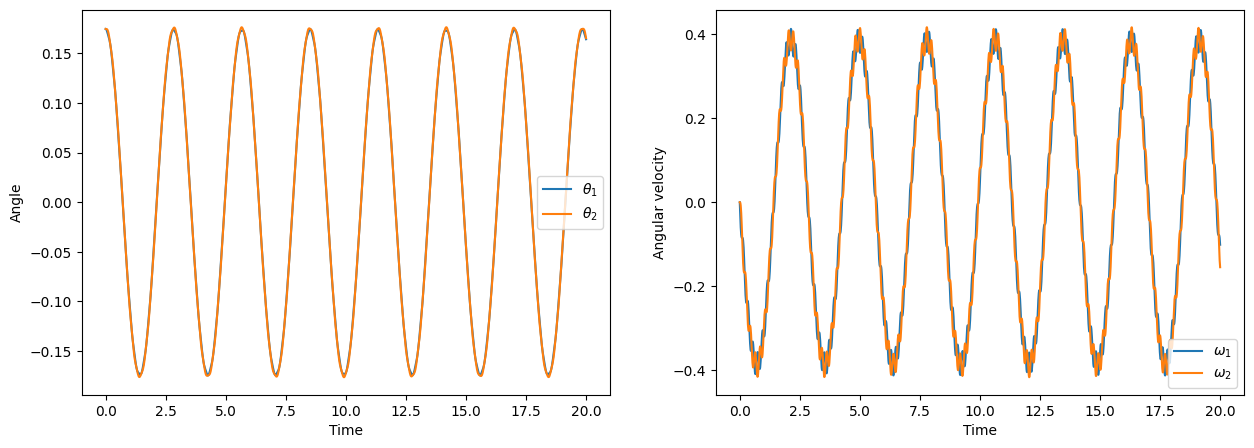

In [26]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].plot(time, ans[:, 0], label=r'$\theta_1$')
ax[0].plot(time, ans[:, 2], label=r'$\theta_2$')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Angle')
ax[0].legend()
ax[1].plot(time, ans[:, 1], label=r'${\omega_1}$')
ax[1].plot(time, ans[:, 3], label=r'${\omega_2}$')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Angular velocity')
ax[1].legend()
plt.show()

Plot the phase space

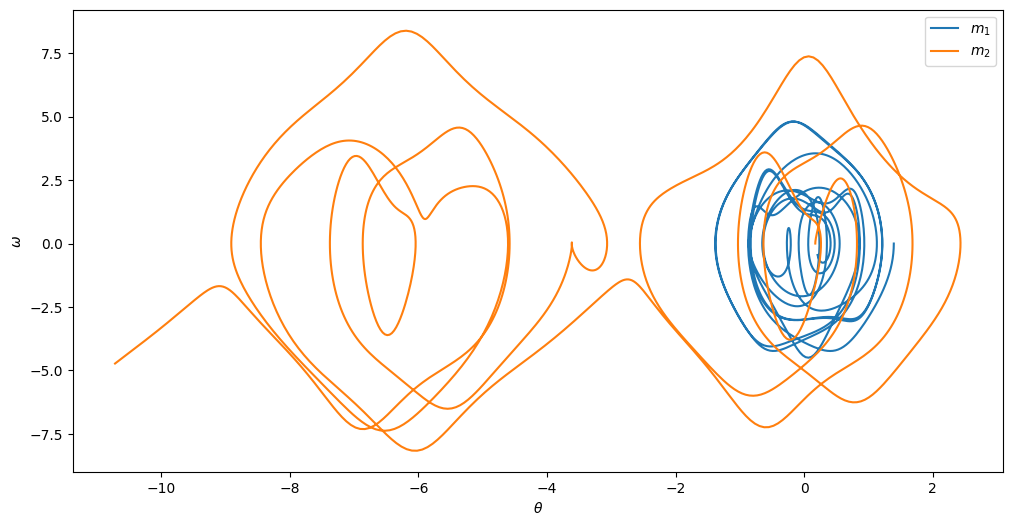

In [20]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 6))
ax.plot(ans[:, 0], ans[:, 1], label=r'$m_1$')
ax.plot(ans[:, 2], ans[:, 3], label=r'$m_2$')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\omega$')
ax.legend()
plt.show()

In the plots we can see chaotic behavior of the system.

Now we need to define a function that returns $x$ and $y$ coordinates of the masses of the system given the time, $\theta_1(t)$, $\theta_2(t)$, $l_1$, $l_2$.

In [21]:
def get_x_y_coordinates(theta_1, theta_2, l_1, l_2):
    x1 = l_1 * np.sin(theta_1)
    y1 = -l_1 * np.cos(theta_1)
    x2 = l_1 * np.sin(theta_1) + l_2 * np.sin(theta_2)
    y2 = -l_1 * np.cos(theta_1) - l_2 * np.cos(theta_2)
    return x1, y1, x2, y2

We get the coordinates of the pendulum at each time step. And then, we create an animation of the pendulum and save it as a gif file.

KeyboardInterrupt: 

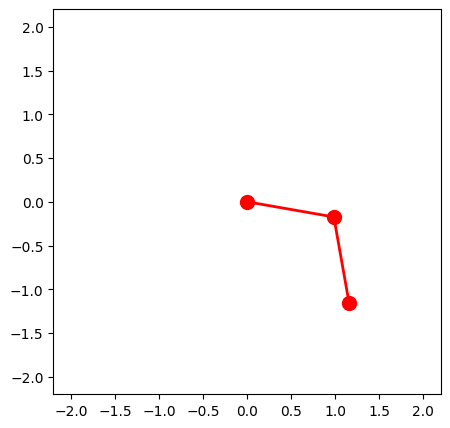

In [22]:
x1, y1, x2, y2 = get_x_y_coordinates(ans.T[0], ans.T[2], l_1, l_2)

def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(5,5))
ln1, = plt.plot([], [], 'ro-', lw=2, markersize=10)

ax.set_xlim(-(l_1+l_2)*1.1,(l_1+l_2)*1.1)
ax.set_ylim(-(l_1+l_2)*1.1,(l_1+l_2)*1.1)
ani = animation.FuncAnimation(fig, animate, frames=len(time[0:-1]), interval=50)
# ani.save('pen.gif',writer='pillow',fps=50) # Uncomment this to save the animation as a gif
HTML(ani.to_jshtml())